In [49]:
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import shap

In [2]:
processed_data_path  ="/Users/elenasmith/Documents/personal/water_git/data/interim/"

In [3]:
deliv_train = pd.read_csv("{}4_unit_correction_model___train.csv".format(processed_data_path))
deliv_test_X= pd.read_csv("{}4_unit_correction_model___test.csv".format(processed_data_path))

['gpcd_from_water_deliv_residential_revised_units_in_orig_units_in_gallons'
 'Population Of Service Area' 'Community Water System'
 'Large Water System' 'Local Government' 'NA'
 'Nontransient Noncommunity Water System' 'Private'
 'Transient Noncommunity Water System' 'AF' 'CCF' 'G' 'MG'
 'Numer of Institutional Service Conections' 'pct_change'
 'original_units_incorrect']


In [12]:
xgb_train_X = deliv_train.drop("original_units_incorrect",axis=1).as_matrix()

In [13]:
gbm = xgb.XGBClassifier()

In [14]:
model = gbm.load_model("{}model_2.model".format(processed_data_path)) 

In [15]:
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(xgb_train_X)
shap_interaction_values = shap.TreeExplainer(gbm).shap_interaction_values(xgb_train_X)

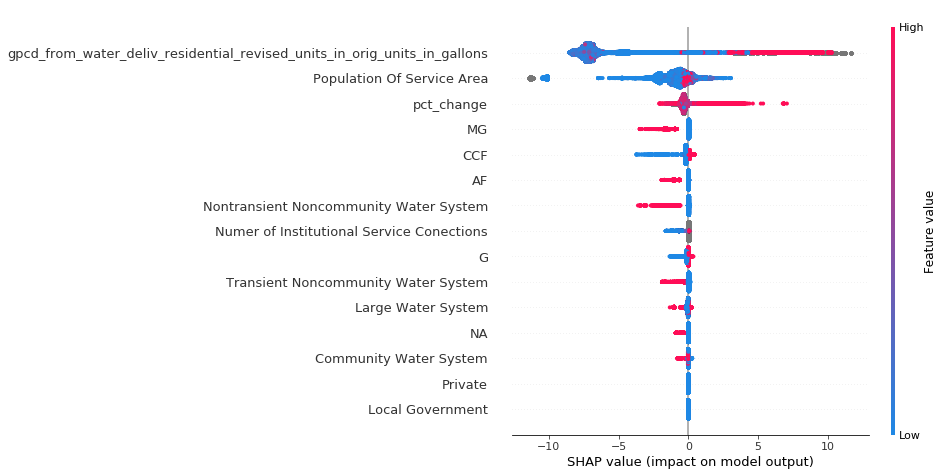

In [21]:
#summarize the effects of all the features
shap.summary_plot(shap_values, xgb_train_X,feature_names=deliv_test_X.drop("original_units_incorrect",axis=1).columns.values)

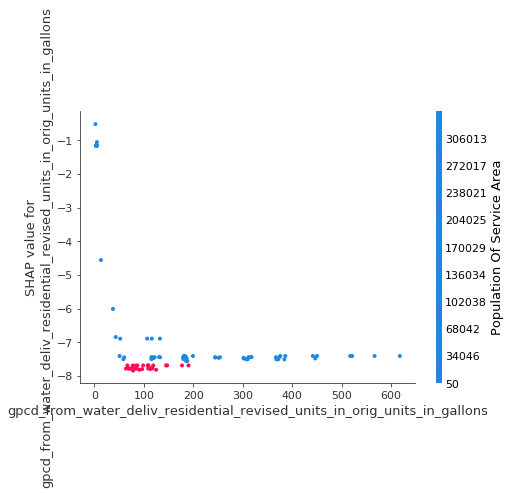

In [24]:
shap.dependence_plot(0, shap_values[0:100], xgb_train_X[0:100],feature_names=deliv_test_X.drop("original_units_incorrect",axis=1).columns.values)

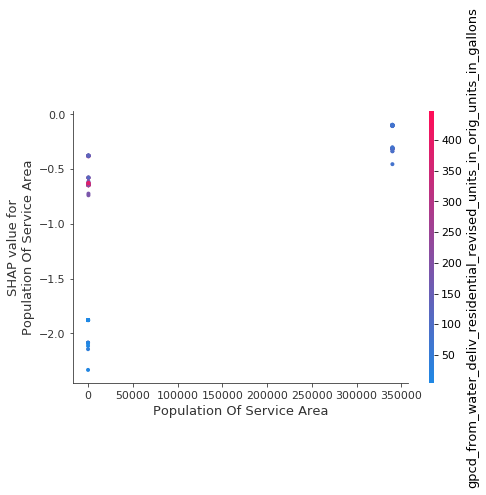

In [26]:
shap.dependence_plot(1, shap_values[0:100], xgb_train_X[0:100],feature_names=deliv_test_X.drop("original_units_incorrect",axis=1).columns.values)

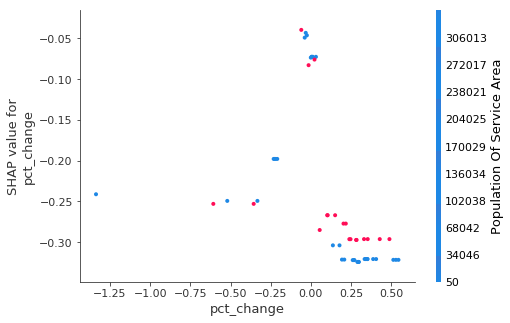

In [29]:
shap.dependence_plot(14, shap_values[0:100], xgb_train_X[0:100],feature_names=deliv_test_X.drop("original_units_incorrect",axis=1).columns.values)

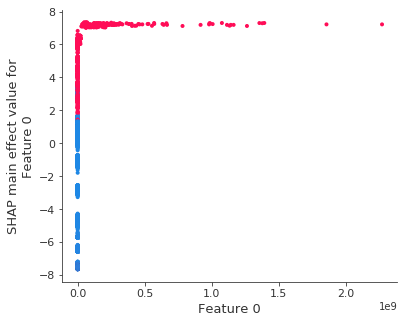

In [22]:
shap.dependence_plot(
    (0, 0),
    shap_interaction_values, xgb_train_X,
    display_features=xgb_train_X
)

### Export data